In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spm1d

In [2]:
filepath = "RELIANCE_2010-01-012021-08-30.csv"
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2010-01-04,1091.1,1091.1,1021.85,1075.50,17520006,RELIANCE
1,2010-01-05,1149.9,1149.9,1065.40,1070.70,4890040,RELIANCE
2,2010-01-06,1079.9,1094.5,1070.65,1088.00,5415538,RELIANCE
3,2010-01-07,1088.0,1115.0,1078.00,1106.05,5988404,RELIANCE
4,2010-01-08,1108.0,1113.8,1096.00,1103.15,3453926,RELIANCE


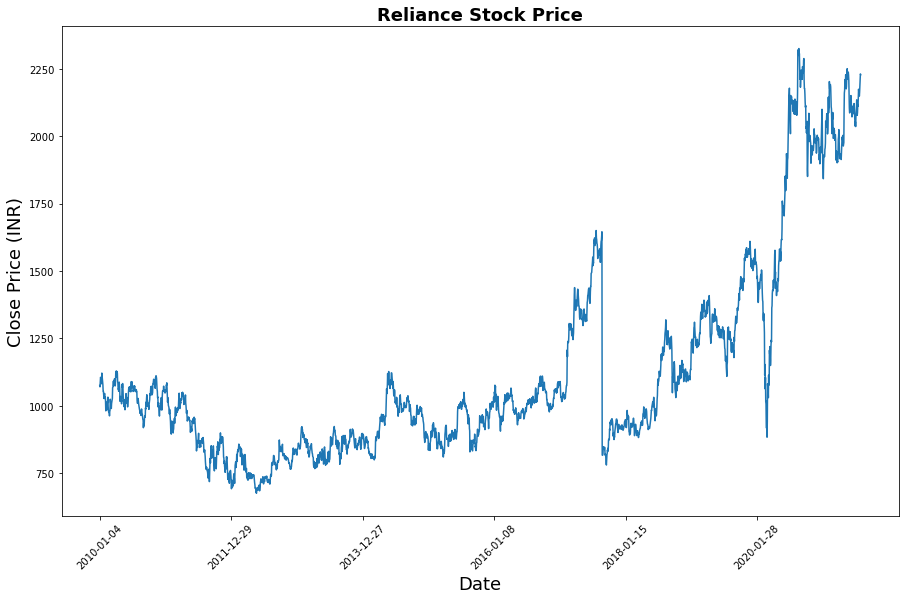

In [3]:
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Reliance Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [4]:
price = data[['Close']]

In [5]:
def splitData(ts):

    test_set_size = int(np.round(0.2*len(ts)));
    train_set = ts[:-test_set_size]    
    test_set = ts[-test_set_size:]

    return train_set, test_set

In [6]:
train_set, test_set = splitData(price['Close'].values)

In [9]:
tn = spm1d.stats.ttest2(train_set, test_set)
tni = tn.inference(0.05)
print(tni)

SPM{T} (0D) inference
   SPM.z        :  -71.78627
   SPM.df       :  (1, 1657.658)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  1.96140
   SPM.h0reject :  True
   SPM.p        :  0.00000




In [10]:
tn = spm1d.stats.nonparam.ttest2(train_set, test_set)
tni = tn.inference(0.05, iterations=1000)
print(tni)

SnPM{t} inference (0D)
   SPM.z              :  -71.786
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SnPM.nPermActual   :  1000 actual permutations
   SPM.alpha          :  0.050
   SPM.zstar (lower)  :  -2.29821
   SPM.zstar (upper)  :  2.12977
   SPM.two_tailed     :  True
   SPM.h0reject       :  True
   SPM.p              :  0.001



In [7]:
window_size = 20
def prepareDataForTraining(seq):

    x_data = []
    y_data = []
    L = len(seq)
    for i in range(L-window_size):        
        window = seq[i:i+window_size]
        label = seq[i+window_size:i+window_size+1]
        x_data.append(window)
        y_data.append(label)
    return x_data, y_data    

In [11]:
x_train, y_train = prepareDataForTraining(train_set)
x_test, y_test = prepareDataForTraining(test_set)

x_train = np.asarray(x_train).reshape(-1, window_size)
y_train = np.asarray(y_train).reshape(-1)
x_test = np.asarray(x_test).reshape(-1, window_size)
y_test = np.asarray(y_test).reshape(-1)

In [12]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2296, 20)
y_train.shape =  (2296,)
x_test.shape =  (559, 20)
y_test.shape =  (559,)


SnPM{T} inference field
   SPM.z              :  (1x20) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  2.07861
   SPM.h0reject       :  False
   SPM.p              :  ()



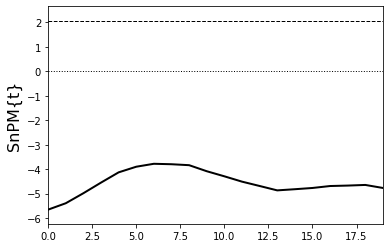

In [14]:
tn = spm1d.stats.nonparam.ttest2(x_train, x_test[:5])
tni = tn.inference(0.05, iterations=1000)
print(tni)
tni.plot()

SnPM{T} inference field
   SPM.z              :  (1x20) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  1.83293
   SPM.h0reject       :  False
   SPM.p              :  ()



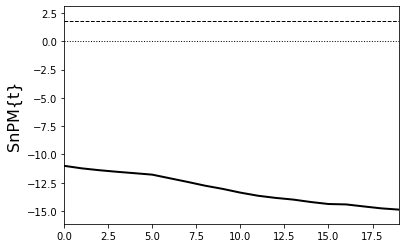

In [15]:
tn = spm1d.stats.nonparam.ttest2(x_train, x_test[265:275])
tni = tn.inference(0.05, iterations=1000)
print(tni)
tni.plot()

<ul>
    <li>Number of observations in every sample of both test and train set should be high enough ~100, to have more permutations possible. </li>
    <li>All samples in train and test needs to be 1D array and test statistic will be 0d</li>
</ul>

In [31]:
x_train = train_set[:2300].reshape(-1, 100)
x_test = test_set[:500].reshape(-1,100)

SnPM{T} inference field
   SPM.z              :  (1x100) raw test stat field
   SnPM.nPermUnique   :  2600 permutations possible
Inference:
   SPM.alpha          :  0.010
   SPM.zstar          :  2.89922
   SPM.h0reject       :  False
   SPM.p              :  ()



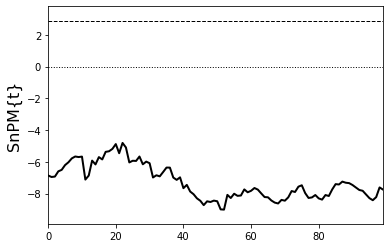

In [42]:
tn = spm1d.stats.nonparam.ttest2(x_train, x_test[2:5])
tni = tn.inference(0.01, iterations=2000)
print(tni)
tni.plot()

In [7]:
tn = spm1d.stats.ttest2(train_set, test_set[:100])
tni = tn.inference(0.05)
print(tni)

SPM{T} (0D) inference
   SPM.z        :  -17.52421
   SPM.df       :  (1, 2337.327)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  1.96098
   SPM.h0reject :  True
   SPM.p        :  0.00000




In [8]:
tn = spm1d.stats.nonparam.ttest2(train_set, test_set[:100])
tni = tn.inference(0.05, iterations=10)
print(tni)
# tni.plot()

SnPM{t} inference (0D)
   SPM.z              :  -17.524
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SnPM.nPermActual   :  10 actual permutations
   SPM.alpha          :  0.050
   SPM.zstar (lower)  :  -1.82941
   SPM.zstar (upper)  :  0.96838
   SPM.two_tailed     :  True
   SPM.h0reject       :  True
   SPM.p              :  0.100



In [11]:
tn = spm1d.stats.nonparam.ttest2(train_set, test_set[100:200])
tni = tn.inference(0.05)
print(tni)

In [10]:
tn = spm1d.stats.nonparam.ttest2(train_set, test_set[0:50])
tni = tn.inference(0.05)
print(tni)

SPM{T} (0D) inference
   SPM.z        :  -13.96365
   SPM.df       :  (1, 2321.051)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  1.96099
   SPM.h0reject :  True
   SPM.p        :  0.00000


